In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-document-classification-dataset/df_file.csv


In [36]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [37]:
data = pd.read_csv("/kaggle/input/text-document-classification-dataset/df_file.csv")

In [38]:
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [39]:
data.isnull().sum()

Text     0
Label    0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [41]:
y = data["Label"]
x = data["Text"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Varsayılan olarak, en sık kullanılan 5000 kelimeyi kullanır
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

In [45]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X_train_vectorized)


MaxAbsScaler()

In [46]:
X_train_vectorized = scaler.transform(X_train_vectorized)

In [47]:
X_test_vectorized = scaler.transform(X_test_vectorized)

In [48]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [49]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9640718562874252
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.99      0.99      0.99       162
           2       0.94      0.96      0.95       107
           3       0.96      0.95      0.95        97
           4       0.97      0.95      0.96       174

    accuracy                           0.96       668
   macro avg       0.96      0.96      0.96       668
weighted avg       0.96      0.96      0.96       668



In [50]:
#technology
text_to_predict = ["Empowering the future with cutting-edge technology and limitless possibilities for innovation."]

text_to_predict_vectorized = vectorizer.transform(text_to_predict)
# to predict
predicted_class = model.predict(text_to_predict_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: [2]


In [51]:
#sport
text_to_predict = ["Elevate your game, embrace the challenge, and celebrate the spirit of competition in the world of sports."]

text_to_predict_vectorized = vectorizer.transform(text_to_predict)
# to predict
predicted_class = model.predict(text_to_predict_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: [1]


In [52]:
#entertainmen
text_to_predict = ["Escape into a world of entertainment, where joy and excitement know no bounds."]

text_to_predict_vectorized = vectorizer.transform(text_to_predict)
# to predict
predicted_class = model.predict(text_to_predict_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: [3]


In [53]:
#politic
text_to_predict = ["United for a better future, where justice and equality prevail."]

text_to_predict_vectorized = vectorizer.transform(text_to_predict)
# to predict
predicted_class = model.predict(text_to_predict_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: [0]


In [54]:
#business
text_to_predict = ["Striving for excellence, forging partnerships, and driving success in the ever-evolving world of business."]

text_to_predict_vectorized = vectorizer.transform(text_to_predict)
# to predict
predicted_class = model.predict(text_to_predict_vectorized)

print("Predicted Class:", predicted_class)
#it cant predict to business

Predicted Class: [3]


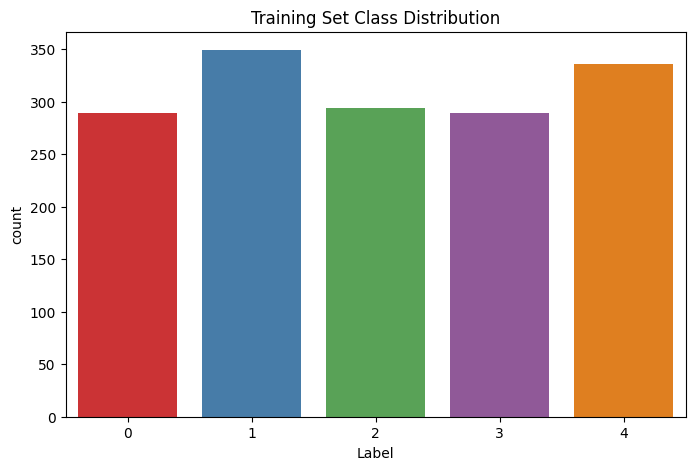

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set1')
plt.title('Training Set Class Distribution')
plt.show()


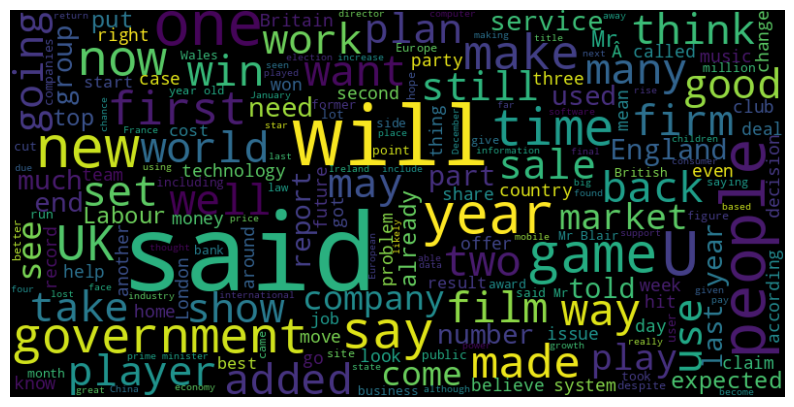

In [56]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110).generate(' '.join(data['Text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


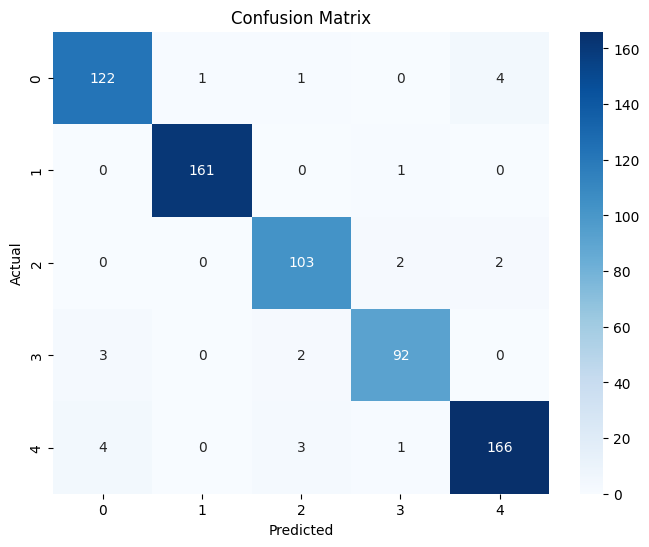

In [57]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
